<a href="https://colab.research.google.com/github/salar-py/Predict-Stock-Prices/blob/main/Predict_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install the dependencies

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
#Load the data 
from google.colab import files
uploaded = files.upload()

Saving EURTRY_Candlestick_1_Hour_ASK_31.12.2019-11.11.2021.csv to EURTRY_Candlestick_1_Hour_ASK_31.12.2019-11.11.2021.csv


In [4]:
#Storethe data into data frame
df =pd.read_csv('EURTRY_Candlestick_1_Hour_ASK_31.12.2019-11.11.2021.csv')
df.head(6)

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2020 00:00:00.000,6.68006,6.68006,6.68006,6.68006,0.0
1,01.01.2020 01:00:00.000,6.68006,6.68006,6.68006,6.68006,0.0
2,01.01.2020 02:00:00.000,6.68006,6.68006,6.68006,6.68006,0.0
3,01.01.2020 03:00:00.000,6.68006,6.68006,6.68006,6.68006,0.0
4,01.01.2020 04:00:00.000,6.68006,6.68006,6.68006,6.68006,0.0
5,01.01.2020 05:00:00.000,6.68006,6.68006,6.68006,6.68006,0.0


In [5]:
# Get the number of trading days
df.shape

(16358, 6)

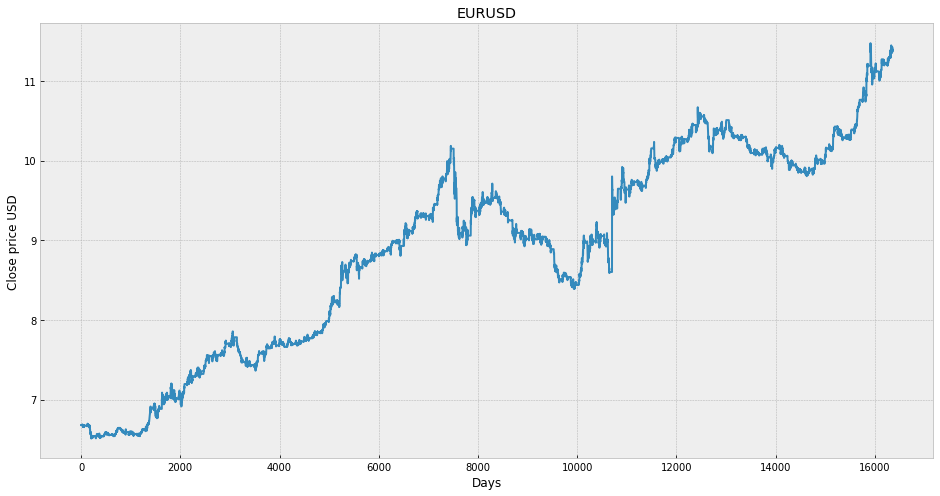

In [6]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('EURUSD')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.show()


In [7]:
#Get the close price
df =df[['Close']]
df.head(4)

,Close
0,6.68006
1,6.68006
2,6.68006
3,6.68006


In [12]:
# Create variable to predict the 'x' Days out into the future
future_days = 25
#Create a new column (Target date) shifted 'x' units,days up
df['prediction'] = df[['Close']].shift(-future_days)
df.tail(10)




,Close,prediction
16348,11.42336,NaN
16349,11.42274,NaN
16350,11.41084,NaN
16351,11.36931,NaN
16352,11.37073,NaN
16353,11.36509,NaN
16354,11.36912,NaN
16355,11.37868,NaN
16356,11.38687,NaN
16357,11.39092,NaN


In [13]:
#Create the feature data set (x) and convert it to a numpy  array and remove the last 'x' rows/days

X = np.array(df.drop(['prediction'], 1 ))[:-future_days]
print(X)

[[ 6.68006]
 [ 6.68006]
 [ 6.68006]
 ...
 [11.3988 ]
 [11.38043]
 [11.37075]]


In [14]:
#@title
#Create the target data set (y) and convert it to numpy array and get all of the target valuse except the last 'x' rows/days
y =np.array(df['prediction'])[:-future_days]
print(y)


[ 6.68476  6.68375  6.67833 ... 11.37868 11.38687 11.39092]


In [15]:
#Split the data into 75% training 25% testing 
x_train, x_test, y_train , Y_test = train_test_split(X,y,test_size = 0.25)

In [17]:
#Create the model 
#Create the decision tree regression model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train , y_train)

In [18]:
#Get the last 'x' rows/days of the feature data set
x_future  = df.drop(['prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_fuutre = np.array(x_future)
x_future

,Close
16308,11.35686
16309,11.38340
16310,11.34761
16311,11.32273
16312,11.30975
16313,11.30556
16314,11.29086
16315,11.28937
16316,11.30206
16317,11.30368


In [19]:
 #Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[11.38617  11.36702  11.34859  11.3627   11.35206  11.35413  11.35672
 11.35899  11.30368  11.382305 11.382305 11.382305 11.382305 11.39599
 11.42477  11.42305  11.42305  11.3988   11.36912  11.37868  11.36509
 11.36912  11.37868  11.38687  11.3988  ]

[11.36133321 11.38784223 11.35209401 11.32724305 11.3142782  11.31009309
 11.29541025 11.29392199 11.30659718 11.30821529 11.30821529 11.30821529
 11.30821529 11.340118   11.33896935 11.35773741 11.35721802 11.37601605
 11.42333075 11.399159   11.44960005 11.41290294 11.40322425 11.3848757
 11.375207  ]


In [ ]:
#Visualize the data 
predictions = tree_prediction

valid = df[X.shape[0]: ]
valid['predictions'] = predictions
plt.figure(figsize=(16 , 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USSD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'predictions']])
plt.legend(['Orig' , 'Val' , 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


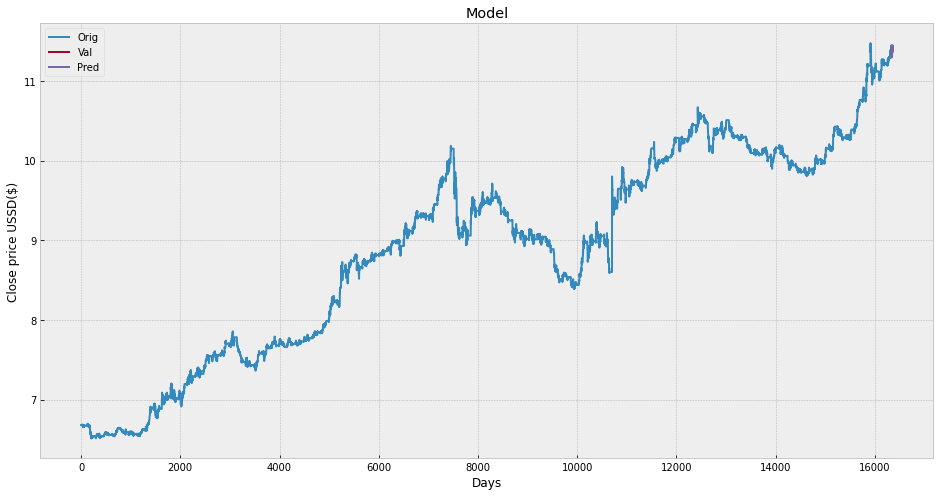

In [21]:
#Visualize the data 
predictions = lr_prediction

valid = df[X.shape[0] : ]
valid['predictions'] = predictions
plt.figure(figsize=(16 , 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USSD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'predictions']])
plt.legend(['Orig' , 'Val' , 'Pred'])
plt.show()